# Predicting population in the next 3 years

## Import libraries

In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor

## Load students data

In [2]:
students = pd.read_csv('Data/students.csv')
semester_split = students.Semester.str.split()
students['Term'] = [semester_split[i][0] for i in range(len(students))]
students['Year'] = [semester_split[i][1] for i in range(len(students))]

students.head()

,Semester,Total_enrollment,Male,Female,Undergrad,Postbac,Master,Doctoral,Professional,Age_Undergrad_Male,...,Pharm_Male,Pharm_Female,White,Hispanic,Asian_American,African_American,International,Others,Term,Year
0,Spring 2014,37538,18917,18621,28535,1234,4190,2039,1540,23.4,...,163,278,11478,9686,7338,3889,3724,1423,Spring,2014
1,Summer 2014,14797,7198,7599,10463,580,1803,1233,718,24.1,...,92,152,4625,3590,2915,1486,1611,570,Summer,2014
2,Fall 2014,40914,20730,20184,31722,1325,4111,2179,1577,23.1,...,166,293,11855,10994,8215,4173,4025,1652,Fall,2014
3,Spring 2015,39032,19774,19258,30080,1347,3936,2136,1533,23.3,...,166,290,11211,10530,7956,3885,3860,1590,Spring,2015
4,Summer 2015,14216,6747,7469,10915,564,1629,460,648,23.8,...,80,152,4444,3818,2989,1390,964,611,Summer,2015


In [3]:
students.Year = students.Year.astype(float)

In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Semester               33 non-null     object 
 1   Total_enrollment       33 non-null     int64  
 2   Male                   33 non-null     int64  
 3   Female                 33 non-null     int64  
 4   Undergrad              33 non-null     int64  
 5   Postbac                33 non-null     int64  
 6   Master                 33 non-null     int64  
 7   Doctoral               33 non-null     int64  
 8   Professional           33 non-null     int64  
 9   Age_Undergrad_Male     33 non-null     float64
 10  Age_Undergrad_Female   33 non-null     float64
 11  Age_Postbac_Male       33 non-null     float64
 12  Age_Postbac_Female     33 non-null     float64
 13  Age_Master_Male        33 non-null     float64
 14  Age_Master_Female      33 non-null     float64
 15  Age_Doct

In [5]:
students_spring = students[students.Term == 'Spring'].copy()
students_fall = students[students.Term == 'Fall'].copy()
students_summer = students[students.Term == 'Summer'].copy()

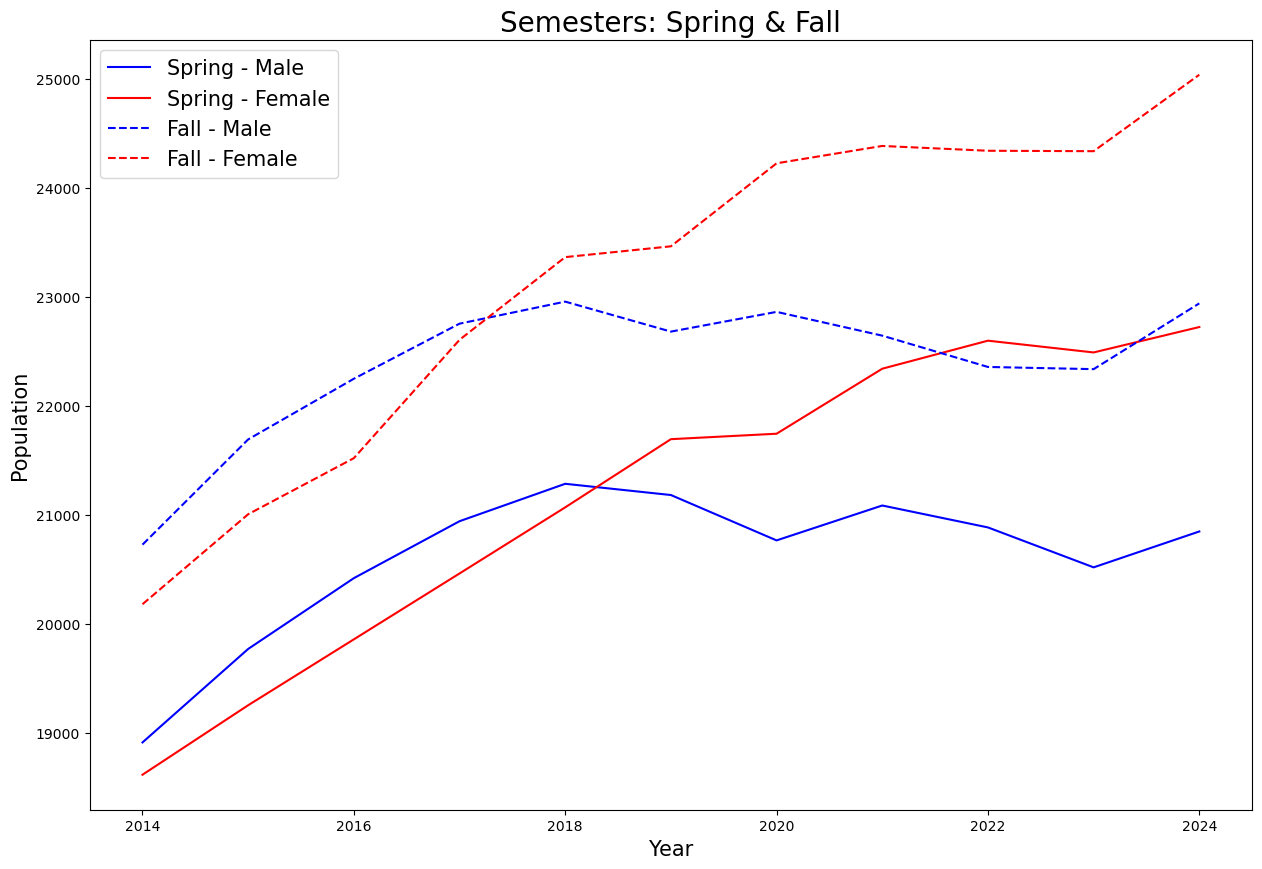

In [6]:
plt.figure(figsize=(15, 10))
plt.plot(students_spring.Year, students_spring.Male, color = 'b', label = 'Spring - Male')
plt.plot(students_spring.Year, students_spring.Female, color = 'r', label = 'Spring - Female')
plt.plot(students_fall.Year, students_fall.Male, linestyle = '--', color = 'b', label = 'Fall - Male')
plt.plot(students_fall.Year, students_fall.Female, linestyle = '--', color = 'r', label = 'Fall - Female')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('Semesters: Spring & Fall', fontsize=20)
plt.legend(fontsize = 15)
plt.show()

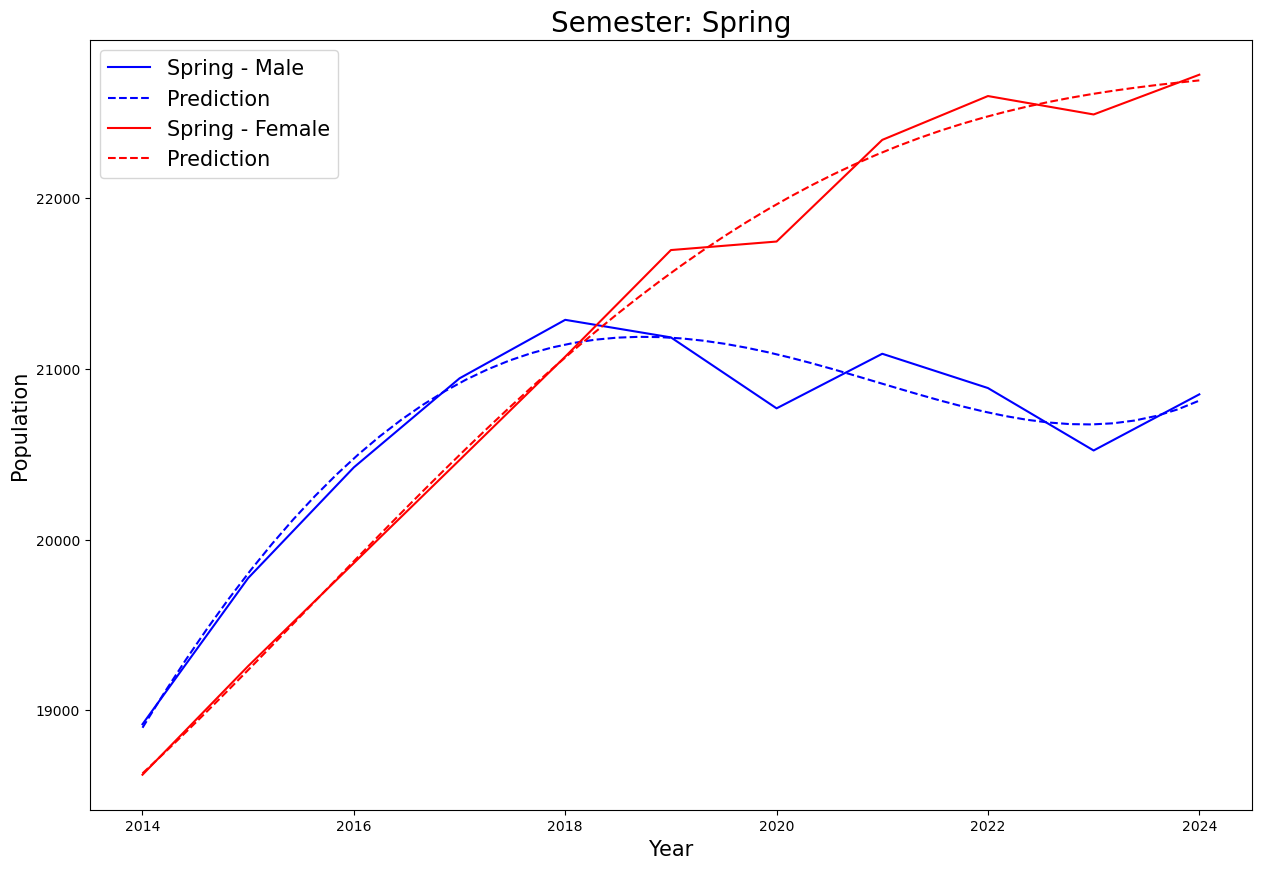

In [41]:
deg = 4
# Create a polynomial function
p_spring_male = np.poly1d(np.polyfit(students_spring.Year, students_spring.Male, deg))
p_spring_female = np.poly1d(np.polyfit(students_spring.Year, students_spring.Female, deg))


# Predict y values for new x values
x_new = np.linspace(2014, 2024)
y_predicted_male = p_spring_male(x_new)
y_predicted_female = p_spring_female(x_new)

plt.figure(figsize=(15, 10))
plt.plot(students_spring.Year, students_spring.Male, color = 'b', label = 'Spring - Male')
plt.plot(x_new,y_predicted_male, linestyle = '--', color = 'b', label = 'Prediction')
plt.plot(students_spring.Year, students_spring.Female, color = 'r', label = 'Spring - Female')
plt.plot(x_new,y_predicted_female, linestyle = '--', color = 'r', label = 'Prediction')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('Semester: Spring', fontsize=20)
plt.legend(fontsize = 15)
plt.show()

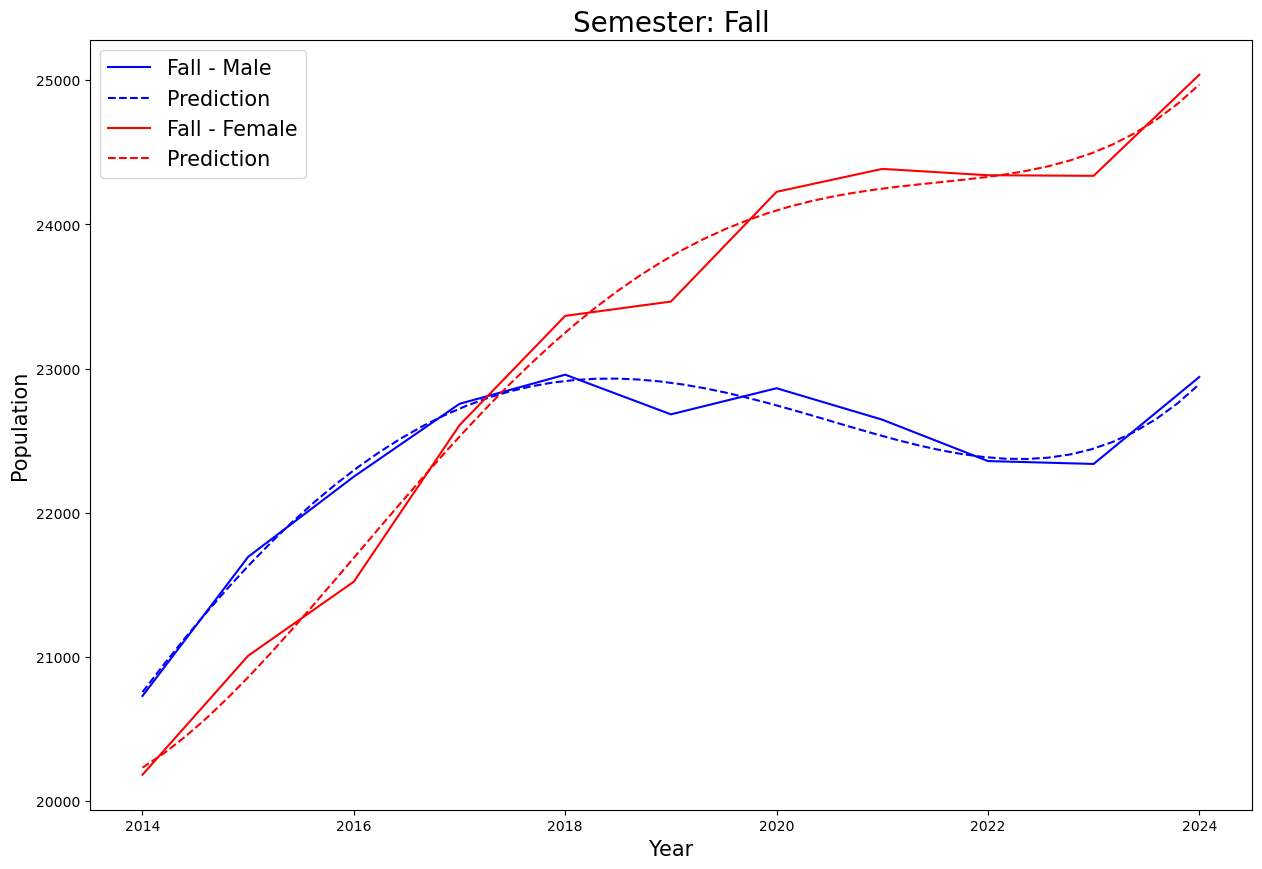

In [40]:
deg = 4
# Create a polynomial function
p_fall_male = np.poly1d(np.polyfit(students_fall.Year, students_fall.Male, deg))
p_fall_female = np.poly1d(np.polyfit(students_fall.Year, students_fall.Female, deg))


# Predict y values for new x values
x_new = np.linspace(2014, 2024)
y_predicted_male = p_fall_male(x_new)
y_predicted_female = p_fall_female(x_new)

plt.figure(figsize=(15, 10))
plt.plot(students_fall.Year, students_fall.Male, color = 'b', label = 'Fall - Male')
plt.plot(x_new,y_predicted_male, linestyle = '--', color = 'b', label = 'Prediction')
plt.plot(students_fall.Year, students_fall.Female, color = 'r', label = 'Fall - Female')
plt.plot(x_new,y_predicted_female, linestyle = '--', color = 'r', label = 'Prediction')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('Semester: Fall', fontsize=20)
plt.legend(fontsize = 15)
plt.show()

In [23]:
students_spring.head()

,Semester,Total_enrollment,Male,Female,Undergrad,Postbac,Master,Doctoral,Professional,Age_Undergrad_Male,...,Pharm_Male,Pharm_Female,White,Hispanic,Asian_American,African_American,International,Others,Term,Year
0,Spring 2014,37538,18917,18621,28535,1234,4190,2039,1540,23.4,...,163,278,11478,9686,7338,3889,3724,1423,Spring,2014.0
3,Spring 2015,39032,19774,19258,30080,1347,3936,2136,1533,23.3,...,166,290,11211,10530,7956,3885,3860,1590,Spring,2015.0
6,Spring 2016,40285,20423,19862,31374,1425,3852,2096,1538,23.2,...,167,299,11129,11118,8284,3959,3880,1915,Spring,2016.0
9,Spring 2017,41411,20945,20466,32502,1303,3927,2122,1557,23.1,...,164,323,11080,12084,8638,3974,3714,1921,Spring,2017.0
12,Spring 2018,42360,21288,21072,33683,1131,3819,2143,1584,22.9,...,180,321,10884,13042,8757,4090,3511,2076,Spring,2018.0


In [33]:
## KNN

## make model objects
knn_2 = KNeighborsRegressor(2)
knn_10 = KNeighborsRegressor(1)

## Fit the models
knn_2.fit(students_spring[['Year']], students_spring.Male)
knn_5.fit(students_spring[['Year']], students_spring.Male)

KNeighborsRegressor()

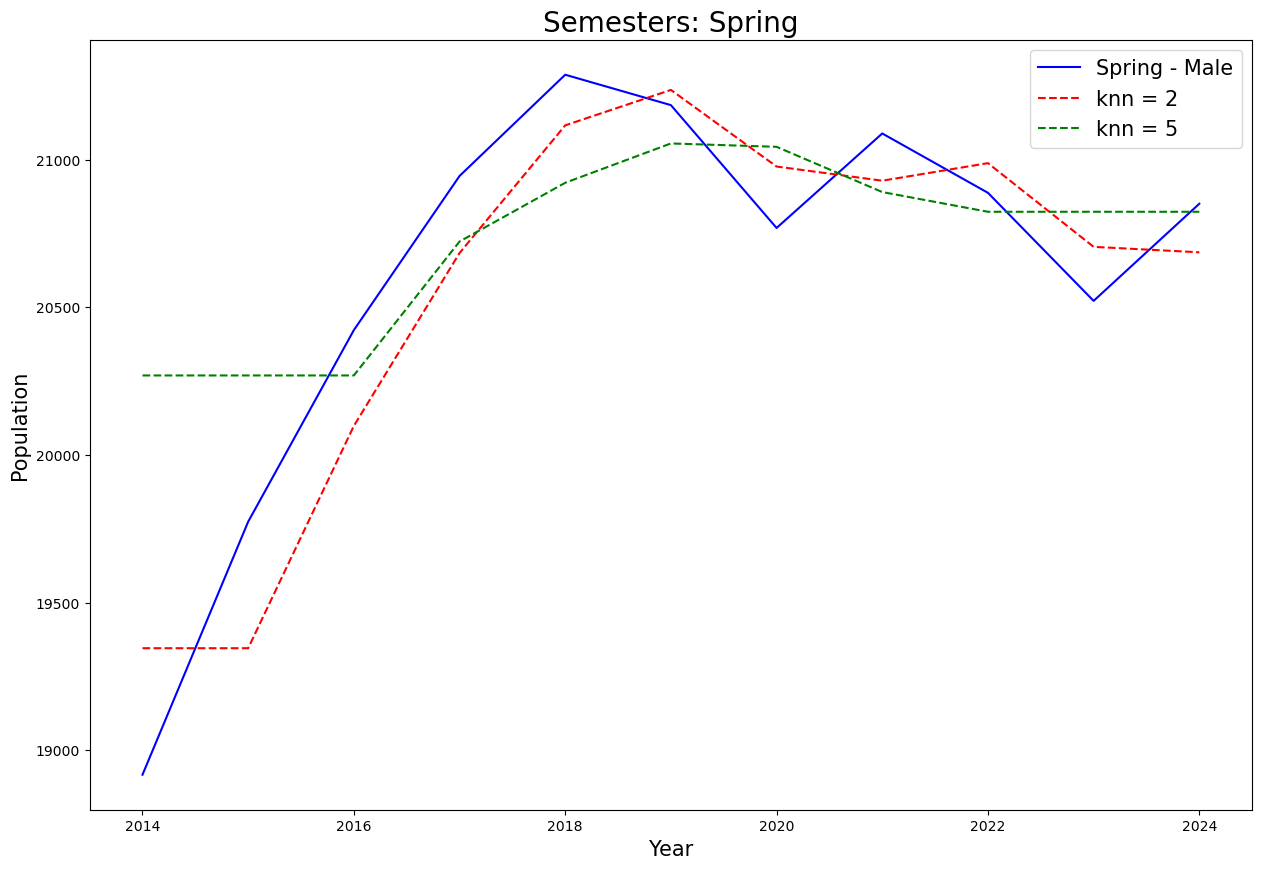

In [34]:
plt.figure(figsize=(15, 10))
plt.plot(students_spring.Year, students_spring.Male, color = 'b', label = 'Spring - Male')
plt.plot(students_spring.Year, knn_2.predict(students_spring[['Year']]), linestyle = '--', color = 'r', label = 'knn = 2')
plt.plot(students_spring.Year, knn_5.predict(students_spring[['Year']]), linestyle = '--', color = 'g', label = 'knn = 5')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('Semesters: Spring', fontsize=20)
plt.legend(fontsize = 15)
plt.show()

## Undergrad Male & Undergrad Female

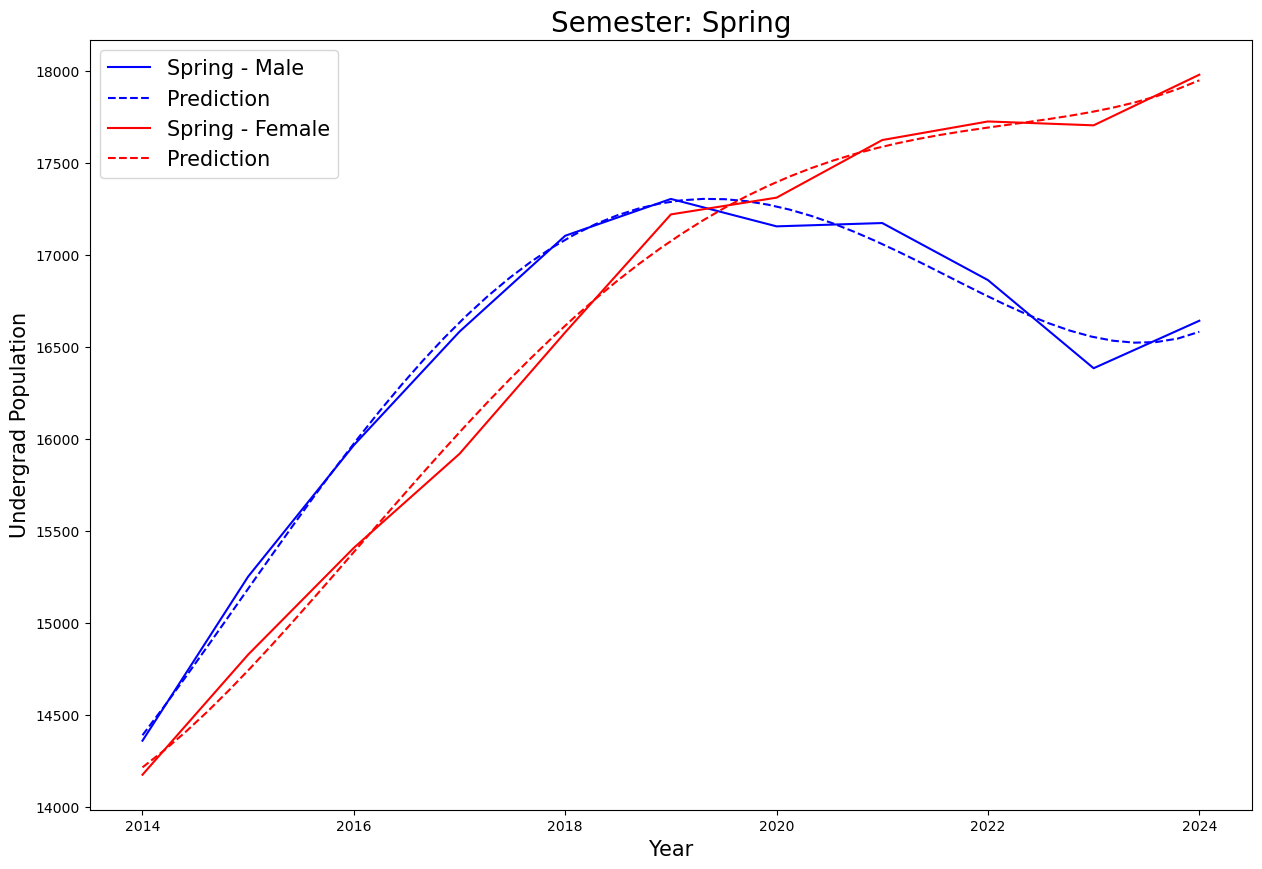

In [43]:
deg = 4
# Create a polynomial function
p_spring_male = np.poly1d(np.polyfit(students_spring.Year, students_spring.Undergrad_Male, deg))
p_spring_female = np.poly1d(np.polyfit(students_spring.Year, students_spring.Undergrad_Female, deg))


# Predict y values for new x values
x_new = np.linspace(2014, 2024)
y_predicted_male = p_spring_male(x_new)
y_predicted_female = p_spring_female(x_new)

plt.figure(figsize=(15, 10))
plt.plot(students_spring.Year, students_spring.Undergrad_Male, color = 'b', label = 'Spring - Male')
plt.plot(x_new,y_predicted_male, linestyle = '--', color = 'b', label = 'Prediction')
plt.plot(students_spring.Year, students_spring.Undergrad_Female, color = 'r', label = 'Spring - Female')
plt.plot(x_new,y_predicted_female, linestyle = '--', color = 'r', label = 'Prediction')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Undergrad Population', fontsize=15)
plt.title('Semester: Spring', fontsize=20)
plt.legend(fontsize = 15)
plt.show()

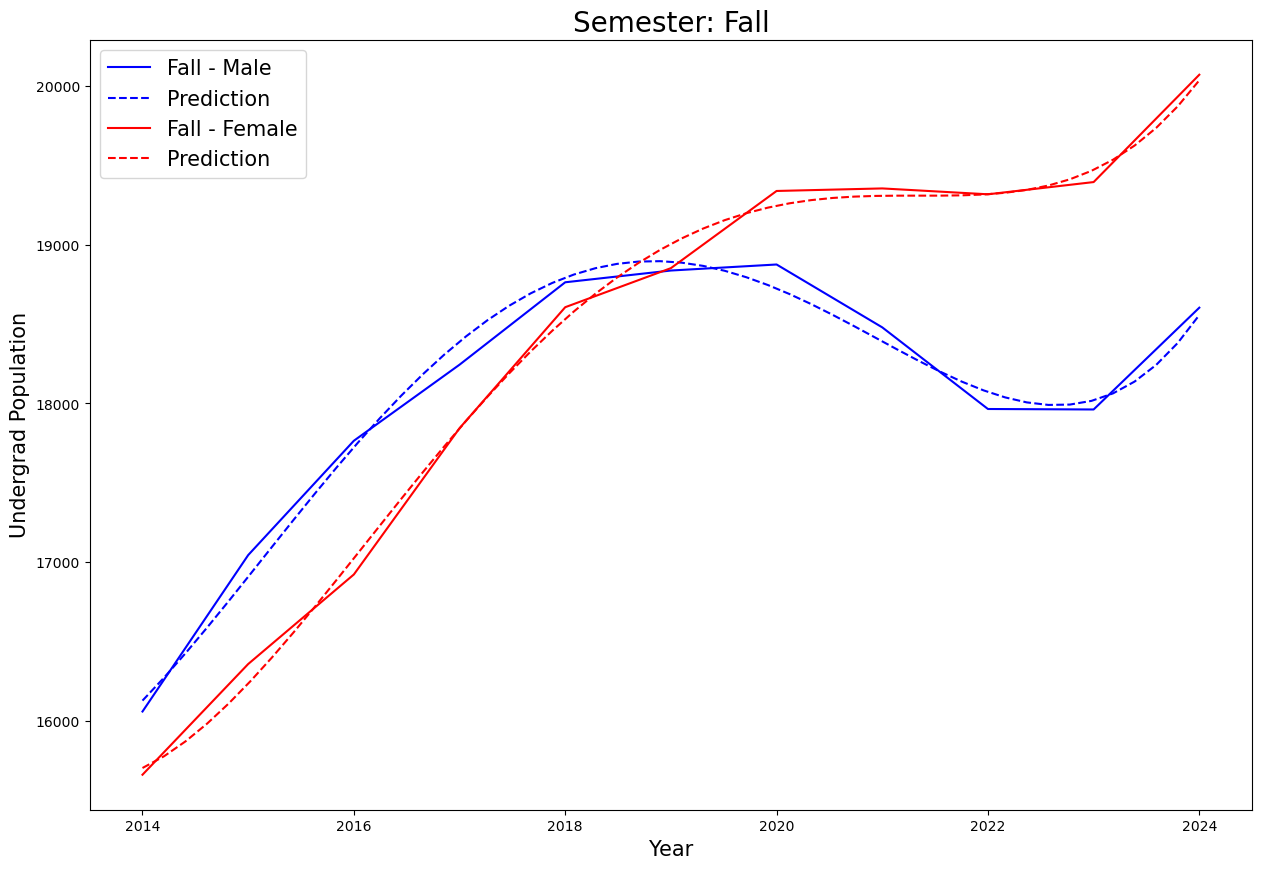

In [42]:
deg = 4
# Create a polynomial function
p_fall_male = np.poly1d(np.polyfit(students_fall.Year, students_fall.Undergrad_Male, deg))
p_fall_female = np.poly1d(np.polyfit(students_fall.Year, students_fall.Undergrad_Female, deg))


# Predict y values for new x values
x_new = np.linspace(2014, 2024)
y_predicted_male = p_fall_male(x_new)
y_predicted_female = p_fall_female(x_new)

plt.figure(figsize=(15, 10))
plt.plot(students_fall.Year, students_fall.Undergrad_Male, color = 'b', label = 'Fall - Male')
plt.plot(x_new,y_predicted_male, linestyle = '--', color = 'b', label = 'Prediction')
plt.plot(students_fall.Year, students_fall.Undergrad_Female, color = 'r', label = 'Fall - Female')
plt.plot(x_new,y_predicted_female, linestyle = '--', color = 'r', label = 'Prediction')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Undergrad Population', fontsize=15)
plt.title('Semester: Fall', fontsize=20)
plt.legend(fontsize = 15)
plt.show()

## Race

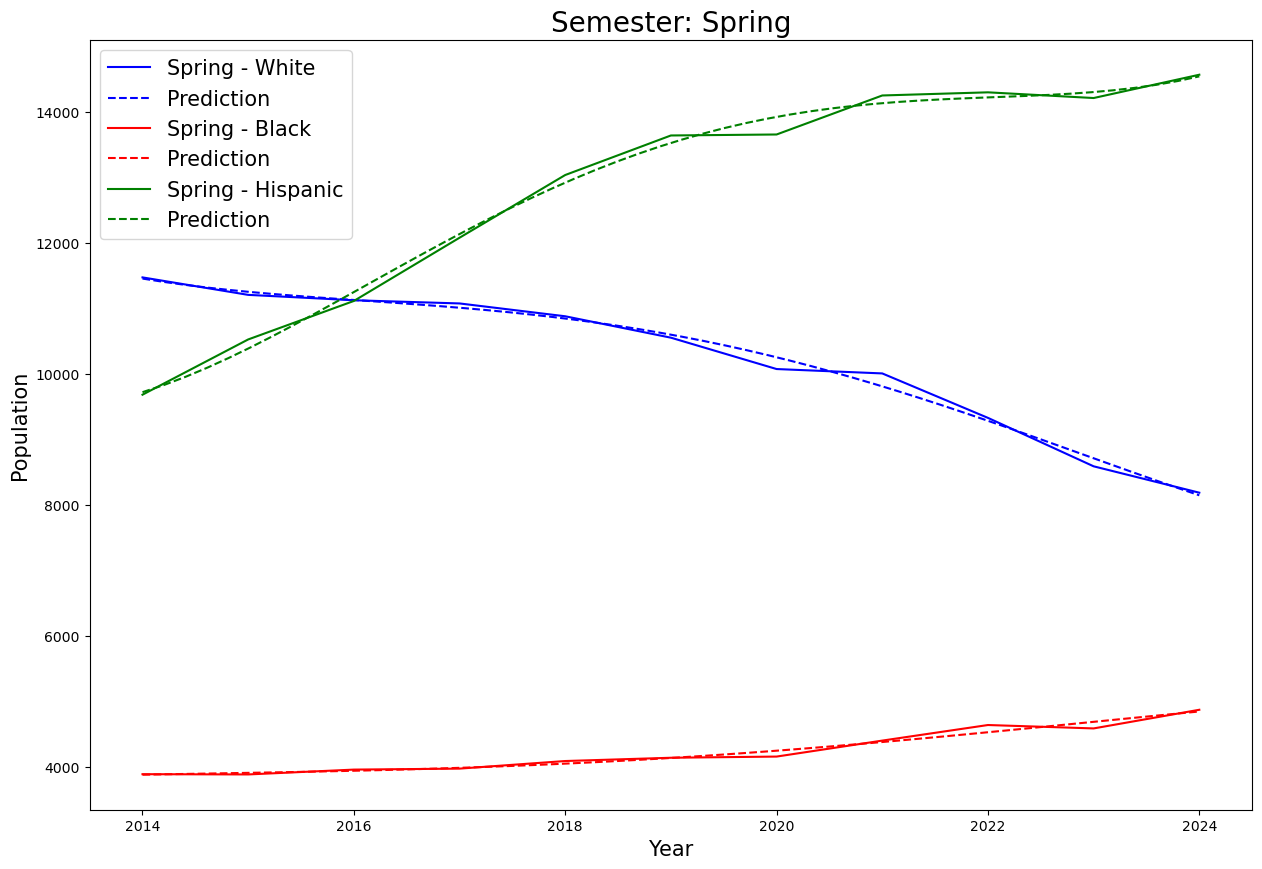

In [47]:
deg = 4
# Create a polynomial function
p_spring_white = np.poly1d(np.polyfit(students_spring.Year, students_spring.White, deg))
p_spring_black = np.poly1d(np.polyfit(students_spring.Year, students_spring.African_American, deg))
p_spring_hispanic = np.poly1d(np.polyfit(students_spring.Year, students_spring.Hispanic, deg))


# Predict y values for new x values
x_new = np.linspace(2014, 2024)
y_predicted_white = p_spring_white(x_new)
y_predicted_black = p_spring_black(x_new)
y_predicted_hispanic = p_spring_hispanic(x_new)


plt.figure(figsize=(15, 10))
plt.plot(students_spring.Year, students_spring.White, color = 'b', label = 'Spring - White')
plt.plot(x_new,y_predicted_white, linestyle = '--', color = 'b', label = 'Prediction')
plt.plot(students_spring.Year, students_spring.African_American, color = 'r', label = 'Spring - Black')
plt.plot(x_new,y_predicted_black, linestyle = '--', color = 'r', label = 'Prediction')
plt.plot(students_spring.Year, students_spring.Hispanic, color = 'g', label = 'Spring - Hispanic')
plt.plot(x_new,y_predicted_hispanic, linestyle = '--', color = 'g', label = 'Prediction')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('Semester: Spring', fontsize=20)
plt.legend(fontsize = 15)
plt.show()

In [ ]:
def student_prediction(semester: str, deg: int, col: list, prediction_year: list):
    if semester == 'Spring':
        df = students_spring
    elif semester == 'Summer':
        df = students_summer
    elif semester == 'Fall':
        df = students_fall
    else:
        print('Invalid semester')

    for c in col:
        p = np.poly1d(np.polyfit(df.Year, df[c], deg))
        x_new = np.linspace(2014, 2024)
        y_predicted_white = p(x_new)
    
    